# "Creepy volcano": test with only hillslope weathering and soil creep

*(Geomorph Seminar, CU Boulder, spring semester 2022)*

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from src.volcanic_island_simulator import VolcanicIslandSimulator
from landlab import imshow_grid

In [18]:
params = {
    'grid': {
        'num_rows': 81,
        'num_cols': 81,
        'spacing': 10.0,
    },
    'cone': {
        'relief': 30.0,
        'angle': 6.0,
        'noise': 0.0
    },
    'timing': {
        'run_duration': 100000.0,
        'timestep_size': 1000.0
    },
    'output': {
        'output_interval_fraction': 0.05,  # e.g., 0.05 means 5% intervals: 5, 10, 15, 20...100%
        'output_file_basename': 'volcanic_island',
    },
    'weathering': {
        "linear_diffusivity": 0.01,  # diffusion coefficient in m^2/yr
        "soil_transport_decay_depth": 1.0,  # depth of soil in m
        "soil_production__maximum_rate": 0.0001,  # soil conversion rate for bare rock in m/yr
        "soil_production__decay_depth": 0.5,  # characteristic weathering depth in m
        "initial_soil_thickness": 1.0,
    },
    'space': {
        "K_sed": 0.0,  # sediment erodibility
        "K_br": 0.0,  # bedrock erodibility
        "F_f": 0.0,  # fraction of fines
        "phi": 0.3,  # sediment porosity
        "H_star": 0.1,  # characteristic sediment thickness (roughness height)
        "v_s": 0.001,  # settling velocity
        "m_sp": 0.5,  # area exponent in stream power equation
        "n_sp": 1.0,  # slope exponent in stream power equation
        "sp_crit_sed": 0.0,  # threshold to erode sediment?
        "sp_crit_br": 0.0,  # threshold to erode bedrock?
        "discharge_field": "surface_water__discharge",
        "solver": "basic",
        "dt_min": 0.001,
    },
    'marine': {
        'sea_level': 0.,
        'wave_base': 5.0,
        'shallow_water_diffusivity': 1.0e-20,   
    }
}

In [19]:
vsim = VolcanicIslandSimulator(params)

initial_topo = vsim.topo.copy()

In [20]:
vsim.run()

Remaining time 95000.0
Remaining time 90000.0
Remaining time 85000.0
Remaining time 80000.0
Remaining time 75000.0
Remaining time 70000.0
Remaining time 65000.0
Remaining time 60000.0
Remaining time 55000.0
Remaining time 50000.0
Remaining time 45000.0
Remaining time 40000.0
Remaining time 35000.0
Remaining time 30000.0
Remaining time 25000.0
Remaining time 20000.0
Remaining time 15000.0
Remaining time 10000.0
Remaining time 5000.0
Remaining time 0.0


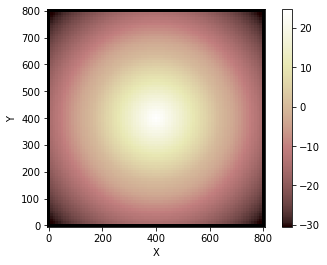

In [21]:
imshow_grid(vsim.grid, 'topographic__elevation')

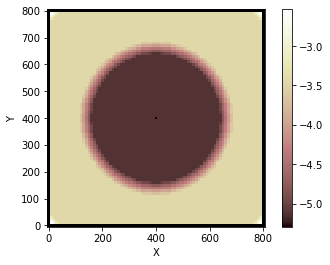

In [22]:
imshow_grid(vsim.grid, vsim.topo - initial_topo)

In [23]:
print(np.mean(initial_topo))
print(np.mean(vsim.topo))

-2.57030802361
-6.4085636219


Text(0, 0.5, 'Elevation (m)')

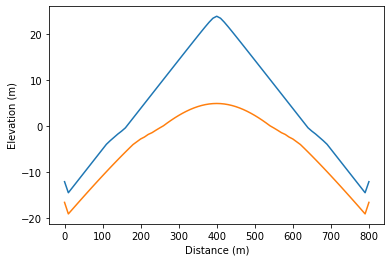

In [24]:
# Plot 2 cross-sections
plt.plot(vsim.grid.x_of_node.reshape(81, 81)[41,:], vsim.topo.reshape(81, 81)[41,:])
plt.plot(vsim.grid.x_of_node.reshape(81, 81)[21,:], vsim.topo.reshape(81, 81)[21,:])
plt.xlabel('Distance (m)')
plt.ylabel('Elevation (m)')

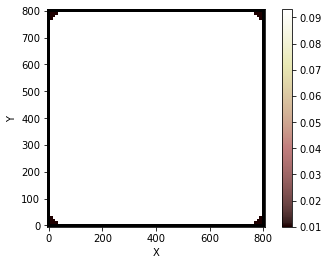

In [27]:
imshow_grid(vsim.grid, vsim.grid.at_node["soil__depth"])